In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In [ ]:
df=pd.read_csv('sales data.csv')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df=df[['Order Date','Sales']]

In [ ]:
df.head()

,Order Date,Sales
0,08/11/2017,261.9600
1,08/11/2017,731.9400
2,12/06/2017,14.6200
3,11/10/2016,957.5775
4,11/10/2016,22.3680


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  9800 non-null   object 
 1   Sales       9800 non-null   float64
dtypes: float64(1), object(1)
memory usage: 153.2+ KB


In [ ]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9800 non-null   datetime64[ns]
 1   Sales       9800 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 153.2 KB


In [ ]:
df=df.sort_values(by='Order Date')

In [ ]:
df.head()

,Order Date,Sales
540,2015-01-02,468.900
5713,2015-01-03,5.940
157,2015-01-03,457.568
6548,2015-01-03,17.472
7949,2015-01-03,63.552


In [ ]:
df.reset_index(inplace=True)
df=df.drop(columns='index')

In [ ]:
df

,Order Date,Sales
0,2015-01-02,468.900
1,2015-01-03,5.940
2,2015-01-03,457.568
3,2015-01-03,17.472
4,2015-01-03,63.552
...,...,...
9795,2018-12-30,52.776
9796,2018-12-30,209.300
9797,2018-12-30,90.930
9798,2018-12-30,323.136


In [ ]:
df=df.rename(columns={'Order Date':'ds','Sales':'y'})

In [ ]:
df.head()

,ds,y
0,2015-01-02,468.900
1,2015-01-03,5.940
2,2015-01-03,457.568
3,2015-01-03,17.472
4,2015-01-03,63.552


In [ ]:
df.tail()

,ds,y
9795,2018-12-30,52.776
9796,2018-12-30,209.300
9797,2018-12-30,90.930
9798,2018-12-30,323.136
9799,2018-12-30,20.720


In [ ]:
m=Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
pre=m.make_future_dataframe(periods=365)

In [ ]:
pre.tail()

,ds
1590,2019-12-26
1591,2019-12-27
1592,2019-12-28
1593,2019-12-29
1594,2019-12-30


In [ ]:
# Python
forecast = m.predict(pre)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1590,2019-12-26,264.753143,-560.983444,1057.048378
1591,2019-12-27,248.740090,-549.312165,1052.773186
1592,2019-12-28,268.084763,-526.578185,1053.188724
1593,2019-12-29,225.053861,-606.594517,1001.946367
1594,2019-12-30,246.837331,-561.095115,1029.411351


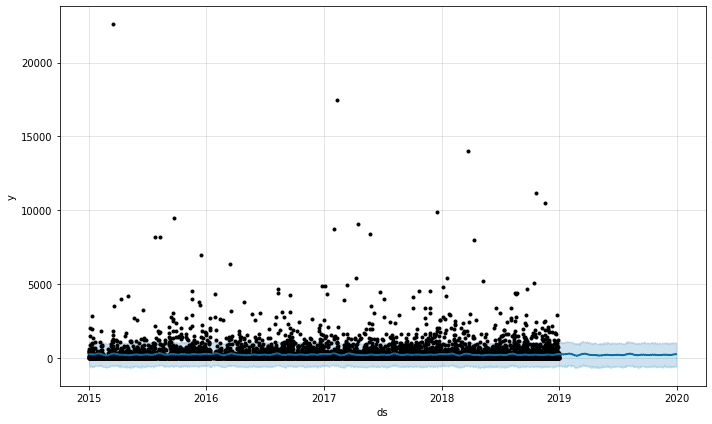

In [ ]:
fig1=m.plot(forecast)

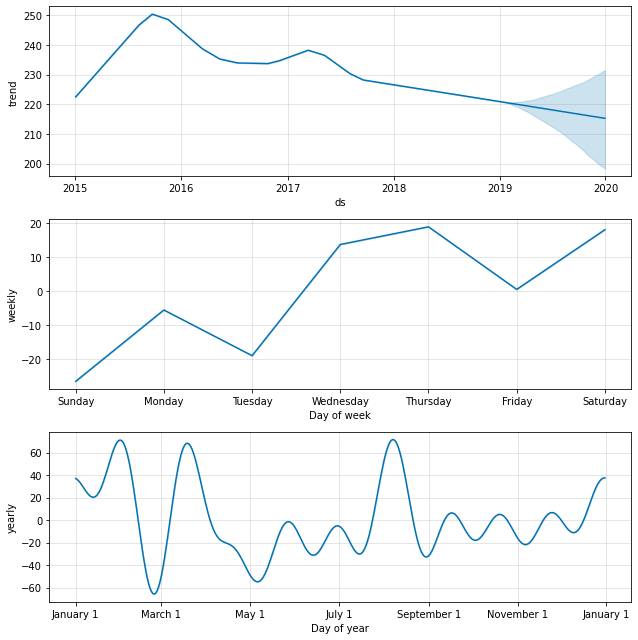

In [ ]:
fig2=m.plot_components(forecast)